In [36]:
from bs4 import BeautifulSoup
import requests

from time import sleep

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver import ActionChains
from selenium.webdriver.common.actions.wheel_input import ScrollOrigin
from selenium.webdriver.common.keys import Keys


In [27]:
# scrape YCombinator's US startup directory
# use Selenium for dynamic webpage
URL = "https://www.ycombinator.com/companies?regions=United%20States%20of%20America"

DRIVER_PATH = "C:\\Users\\jyin1\\Downloads\\chromedriver-win64"

# Create a Service object
service = Service(DRIVER_PATH)

# Create a ChromeOptions object if needed
options = Options()
# Example: options.add_argument("--headless")  # Run in headless mode

# Initialize the WebDriver with the service object and options

# driver = webdriver.Chrome(service=service, options=options)
# driver = webdriver.Chrome(DRIVER_PATH)
def _in_viewport(driver, element):
    script = (
        "for(var e=arguments[0],f=e.offsetTop,t=e.offsetLeft,o=e.offsetWidth,n=e.offsetHeight;\n"
        "e.offsetParent;)f+=(e=e.offsetParent).offsetTop,t+=e.offsetLeft;\n"
        "return f<window.pageYOffset+window.innerHeight&&t<window.pageXOffset+window.innerWidth&&f+n>\n"
        "window.pageYOffset&&t+o>window.pageXOffset"
    )
    return driver.execute_script(script, element)

In [52]:
driver = webdriver.Chrome()

# navigate to the URL
driver.get(URL)

# scroll to bottom and load all elements
scroll_count = 70
for i in range(scroll_count):
    sleep(2) # wait till page has loaded
    html = driver.find_element(By.TAG_NAME, 'html')
    html.send_keys(Keys.END)

# get all pill elements containing batch and industry information
pills = driver.find_elements(By.CLASS_NAME, "_pill_86jzd_33")

# create a frequency map for batches
batches = {}
count = 0
for pill in pills:
    text = pill.text
    # check it contains batch information
    if len(text) == 3 and (text[0] == 'W' or text[0] == 'S'):
        count += 1
        if text in batches:
            batches[text] += 1
        else:
            batches[text] = 1

print(count)
print(len(batches))     
print(batches)

driver.quit()

100
28
{'W09': 1, 'W12': 3, 'S12': 5, 'S13': 2, 'S07': 1, 'S14': 5, 'W15': 5, 'S10': 2, 'W14': 4, 'W16': 19, 'S20': 1, 'S18': 2, 'W17': 3, 'W19': 1, 'W13': 1, 'S17': 1, 'S15': 31, 'W11': 1, 'S09': 2, 'W21': 1, 'W18': 1, 'S19': 1, 'W10': 1, 'S05': 1, 'S16': 1, 'S06': 1, 'W20': 1, 'S11': 2}


In [61]:
batches = {
    'S24': 36,
    'W24': 159,
    'S23': 136,
    'W23': 184,
    'S22': 138,
    'W22': 220,
    'S21': 211,
    'W21': 187,
    'S20': 142,
    'W20': 150,
    'S19': 125,
    'W19': 141,
    'S18': 100,
    'W18': 109,
    'S17': 95,
    'W17': 76,
    'IK1': 259,
    'S16': 79,
    'W16': 105,
    'S15': 86,
    'W15': 95,
    'S14': 65,
    'W14': 63,
    'S13': 45,
    'W13': 43,
    'S12': 68,
    'W12': 58,
    'S11': 56,
    'W11': 38,
    'S10': 32,
    'W10': 24,
    'S09': 22,
    'W09': 14,
    'S08': 15,
    'W08': 15,
    'S07': 14,
    'W07': 12,
    'S06': 8,
    'W06': 6,
    'S05': 7
}

gen_ai_batch_count = {
    'S24': 3,
    'W24': 23,
    'S23': 33, 
    'W23': 43, 
    'S22': 17, 
    'W22': 10, 
    'S21': 9, 
    'W21': 3, 
    'S20': 5, 
    'W20': 3, 
    'S19': 4, 
    'W19': 2, 
    'S18': 2, 
    'W18': 3, 
    'S17': 1, 
    'W17': 1, 
    'W15': 1, 
    'W14': 1
}

In [62]:
# calculate percentage of gen AI startups in each batch
gen_ai_percentage = {}

# Calculate the percentage of gen_ai in each batch
for key in gen_ai_batch_count:
    if key in batches:
        percentage = (gen_ai_batch_count[key] / batches[key]) * 100
        gen_ai_percentage[key] = percentage

# Print the resulting dictionary
print(gen_ai_percentage)

{'S24': 8.333333333333332, 'W24': 14.465408805031446, 'S23': 24.264705882352942, 'W23': 23.369565217391305, 'S22': 12.318840579710146, 'W22': 4.545454545454546, 'S21': 4.265402843601896, 'W21': 1.6042780748663104, 'S20': 3.5211267605633805, 'W20': 2.0, 'S19': 3.2, 'W19': 1.4184397163120568, 'S18': 2.0, 'W18': 2.7522935779816518, 'S17': 1.0526315789473684, 'W17': 1.3157894736842104, 'W15': 1.0526315789473684, 'W14': 1.5873015873015872}


In [63]:
gen_ai_percentage = {'S24': 8.333333333333332, 'W24': 14.465408805031446, 'S23': 24.264705882352942, 'W23': 23.369565217391305, 'S22': 12.318840579710146, 'W22': 4.545454545454546, 'S21': 4.265402843601896, 'W21': 1.6042780748663104, 'S20': 3.5211267605633805, 'W20': 2.0, 'S19': 3.2, 'W19': 1.4184397163120568, 'S18': 2.0, 'W18': 2.7522935779816518, 'S17': 1.0526315789473684, 'W17': 1.3157894736842104, 'W15': 1.0526315789473684, 'W14': 1.5873015873015872}

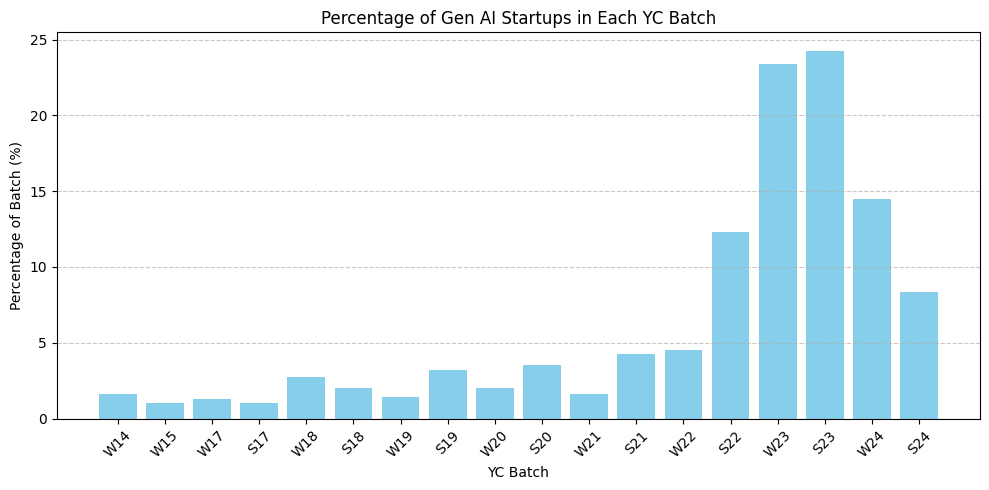

In [64]:
# graph findings for Gen AI Startups
import matplotlib.pyplot as plt

gen_ai_keys = list(gen_ai_percentage.keys())
gen_ai_values = list(gen_ai_percentage.values())

# Create the bar plot
plt.figure(figsize=(10, 5))
plt.bar(gen_ai_keys, gen_ai_values, color='skyblue')
plt.xlabel('YC Batch')
plt.ylabel('Percentage of Batch (%)')
plt.title('Percentage of Gen AI Startups in Each YC Batch')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()


In [67]:
healthcare_batch_count = {
    'S24': 1,
    'W24': 12,
    'S23': 9, 
    'W23': 11, 
    'S22': 5, 
    'W22': 15, 
    'S21': 11, 
    'W21': 7, 
    'S20': 5, 
    'W20': 6, 
    'S19': 4, 
    'W19': 2, 
    'S18': 5, 
    'W18': 4, 
    'S17': 3, 
    'W17': 6, 
    'S16': 5, 
    'S15': 4, 
    'W15': 4, 
    'S14': 1, 
    'W13': 2, 
    'S12': 1, 
    'W12': 2, 
    'S11': 1, 
    'W11': 1,
}

In [68]:
# calculate percentage of healthcare startups ine ach batch as a control group
healthcare_percentage = {}

# Calculate the percentage of gen_ai in each batch
for key in healthcare_batch_count:
    if key in batches:
        percentage = (healthcare_batch_count[key] / batches[key]) * 100
        healthcare_percentage[key] = percentage

# Print the resulting dictionary
print(healthcare_percentage)

{'S24': 2.7777777777777777, 'W24': 7.547169811320755, 'S23': 6.61764705882353, 'W23': 5.978260869565218, 'S22': 3.6231884057971016, 'W22': 6.8181818181818175, 'S21': 5.213270142180095, 'W21': 3.7433155080213902, 'S20': 3.5211267605633805, 'W20': 4.0, 'S19': 3.2, 'W19': 1.4184397163120568, 'S18': 5.0, 'W18': 3.669724770642202, 'S17': 3.1578947368421053, 'W17': 7.894736842105263, 'S16': 6.329113924050633, 'S15': 4.651162790697675, 'W15': 4.2105263157894735, 'S14': 1.5384615384615385, 'W13': 4.651162790697675, 'S12': 1.4705882352941175, 'W12': 3.4482758620689653, 'S11': 1.7857142857142856, 'W11': 2.631578947368421}


In [69]:
healthcare_percentage = {'S24': 2.7777777777777777, 'W24': 7.547169811320755, 'S23': 6.61764705882353, 'W23': 5.978260869565218, 'S22': 3.6231884057971016, 'W22': 6.8181818181818175, 'S21': 5.213270142180095, 'W21': 3.7433155080213902, 'S20': 3.5211267605633805, 'W20': 4.0, 'S19': 3.2, 'W19': 1.4184397163120568, 'S18': 5.0, 'W18': 3.669724770642202, 'S17': 3.1578947368421053, 'W17': 7.894736842105263, 'S16': 6.329113924050633, 'S15': 4.651162790697675, 'W15': 4.2105263157894735, 'S14': 1.5384615384615385, 'W13': 4.651162790697675, 'S12': 1.4705882352941175, 'W12': 3.4482758620689653, 'S11': 1.7857142857142856, 'W11': 2.631578947368421}

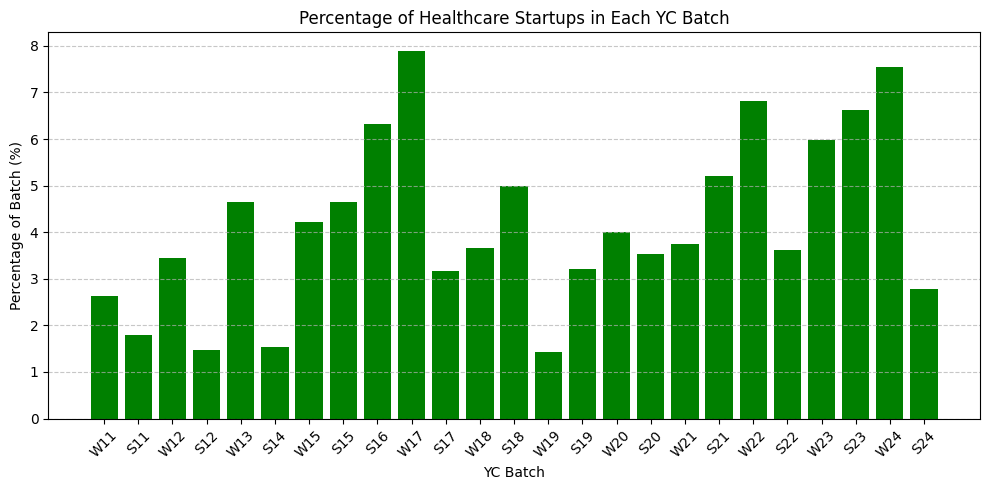

In [70]:
# graph findings for healthcare startups as a control group

healthcare_keys = list(healthcare_percentage.keys())
healthcare_values = list(healthcare_percentage.values())

# Create the bar plot
plt.figure(figsize=(10, 5))
plt.bar(healthcare_keys, healthcare_values, color='green')
plt.xlabel('YC Batch')
plt.ylabel('Percentage of Batch (%)')
plt.title('Percentage of Healthcare Startups in Each YC Batch')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()
